## Civil structure analysis

In this work we create a python script able to load a .stl 3D model file of a civil structure, locate a observation point, ray trace the target and estimate the crosing distance

https://asahidari.hatenablog.com/entry/2020/05/08/122832

https://pypi.org/project/numpy-stl/

In [1]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def line_eq (x, a, b):
    y = a*x + b
    return y

In [3]:
def find_nearest(array, value): # Return the nearest value of an array and its index
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

/tmp/ipykernel_32866/1862719702.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


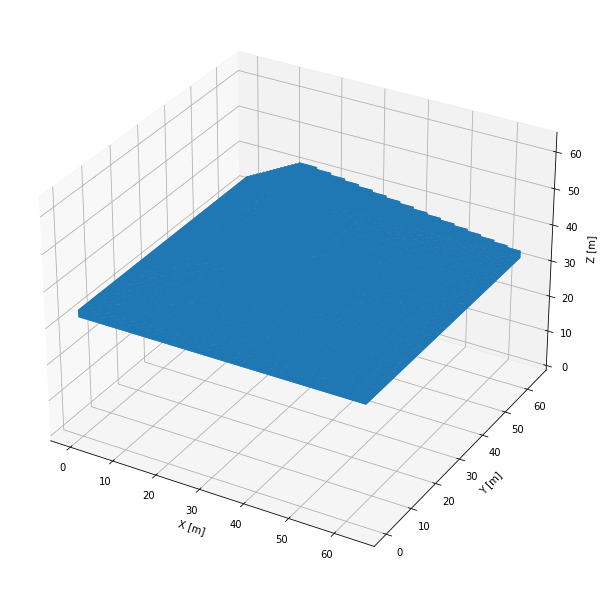

In [4]:
# Create a new plot
figure = pyplot.figure(figsize=(8,8))
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('../Civil/Egyptian_Pyramid.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

axes.set_xlabel('X [m]')
axes.set_ylabel('Y [m]')
axes.set_zlabel('Z [m]')

# Show the plot to the screen
pyplot.show()

/tmp/ipykernel_32866/994931762.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


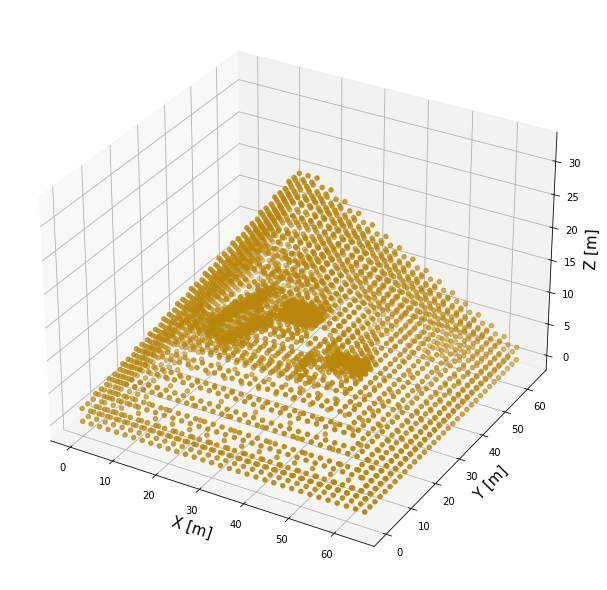

In [5]:
vertices = your_mesh.vectors.reshape(3*len(your_mesh.vectors), 3)
vertices = np.unique(vertices, axis=0)
x, y, z = zip(*vertices)
z = z-min(z)

figure = plt.figure(figsize=(8,8))
axes = mplot3d.Axes3D(figure)
axes.scatter3D(x, y, z, c='darkgoldenrod')

axes.set_xlabel('X [m]', fontsize=15)
axes.set_ylabel('Y [m]', fontsize=15)
axes.set_zlabel('Z [m]', fontsize=15)

plt.show()

In [6]:
# Observation point

Po_x = 80
Po_y = 40
Po_z = 0

/tmp/ipykernel_32866/2817375460.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


Text(0.5, 0, 'Z [m]')

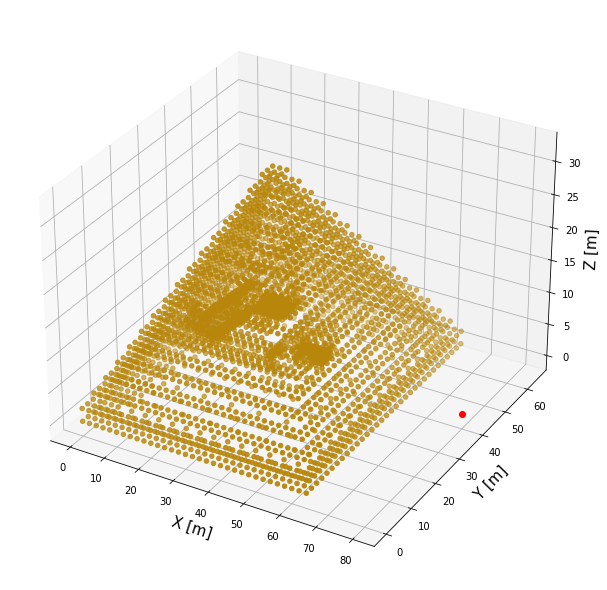

In [7]:
figure = plt.figure(figsize=(8,8))
axes = mplot3d.Axes3D(figure)
axes.scatter3D(x, y, z, c='darkgoldenrod')
axes.plot(Po_x, Po_y, Po_z, 'or')

axes.set_xlabel('X [m]', fontsize=15)
axes.set_ylabel('Y [m]', fontsize=15)
axes.set_zlabel('Z [m]', fontsize=15)

## Ray tracing

Define azimuth $\phi$, cenith angle $\theta$, projection distance $R$ and the projected point coordinates (a,b,c)


In [8]:
# Highest point of the structure

Pp_x = x[np.argmax(z)]
Pp_y = y[np.argmax(z)]
Pp_z = max(z)

print ("Observation point x = %f, y = %f, z = %f" % (Po_x, Po_y, Po_z))
print ("Projected point a = %f, b = %f, c = %f" % (Pp_x, Pp_y, Pp_z))

Observation point x = 80.000000, y = 40.000000, z = 0.000000
Projected point a = 30.000000, b = 30.000000, c = 32.000000


In [9]:
# Two dimensional distance to the projected point
Dpp = np.sqrt((Pp_x-Po_x)**2+(Pp_y-Po_y)**2)

# Define maximum elevation angle

Max_Ele = np.arctan((Pp_z-Po_z)/Dpp)
D_azim = np.arctan((Pp_y-Po_y)/(Pp_x-Po_x))

print ("Distance to the interest point %f m" % Dpp)                
print ("Maximum elevation angle %fº" % (Max_Ele*180/np.pi))
print ("Azimuth difference %fº" % (D_azim*180/np.pi))
Dpp

Distance to the interest point 50.990195 m
Maximum elevation angle 32.111216º
Azimuth difference 11.309932º


50.99019513592785

In [10]:
# Estimation of the sky projection

R = 100 # m
azimuth = -0.2
cenith = Max_Ele

theta = cenith # radians
phi = -D_azim -azimuth

b = R*np.sin(phi)*np.cos(theta)
a = R*np.cos(phi)*np.cos(theta)
c = R*np.sin(theta)

Ps_x = Po_x - a
Ps_y = Po_y - b
Ps_z = Po_z + c

print ("Projected point a = %f, b = %f, c = %f" % (Ps_x, b, Ps_z))

Px = [Po_x, Ps_x ]
Py = [Po_y, Ps_y]
Pz = [Po_z, Ps_z]

Projected point a = -4.701501, b = 0.220600, c = 53.156440


/tmp/ipykernel_32866/3780308123.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "*r" (-> marker='*'). The keyword argument will take precedence.
  ax.plot(Po_x, Po_y, Po_z, '*r', marker='s', ms=10)


Text(0.5, 0, 'Z [m]')

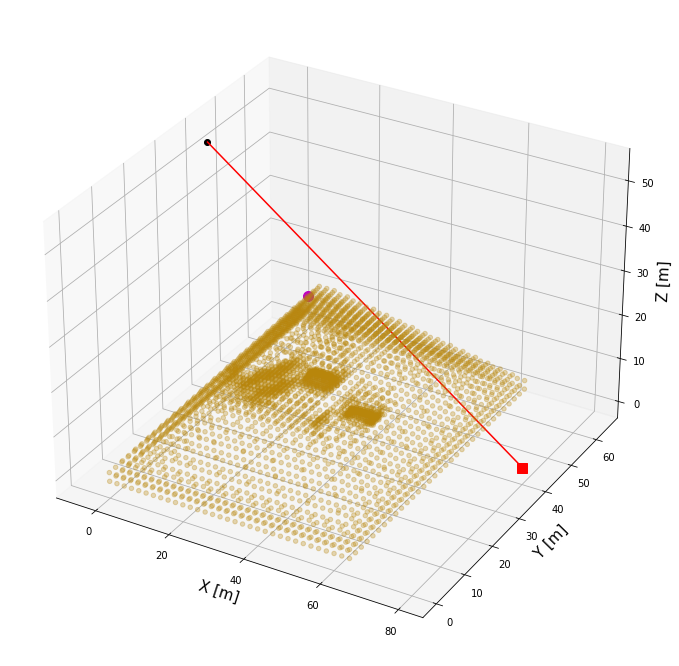

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x, y, z, c='darkgoldenrod', alpha=0.3)
ax.plot(Po_x, Po_y, Po_z, '*r', marker='s', ms=10)
ax.plot(Pp_x, Pp_y, Pp_z, 'om', ms=10)
ax.plot(Ps_x, Ps_y, Ps_z, 'ok',)
ax.plot(Px, Py, Pz, 'r')

ax.set_xlabel('X [m]', fontsize=15)
ax.set_ylabel('Y [m]', fontsize=15)
ax.set_zlabel('Z [m]', fontsize=15)

## Projection fit

In [12]:
# XY ray projection, line equation extraction and generation of XY point for extraction elevation profiles

# fit curve
popt, ppam = curve_fit(line_eq, Px, Py)

N = 1000 # number of evaluation points

X_p = np.linspace(Po_x, Ps_x, N)
Y_p = popt[0]*X_p + popt[1]

/home/penaj/.local/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 0, 'Z [m]')

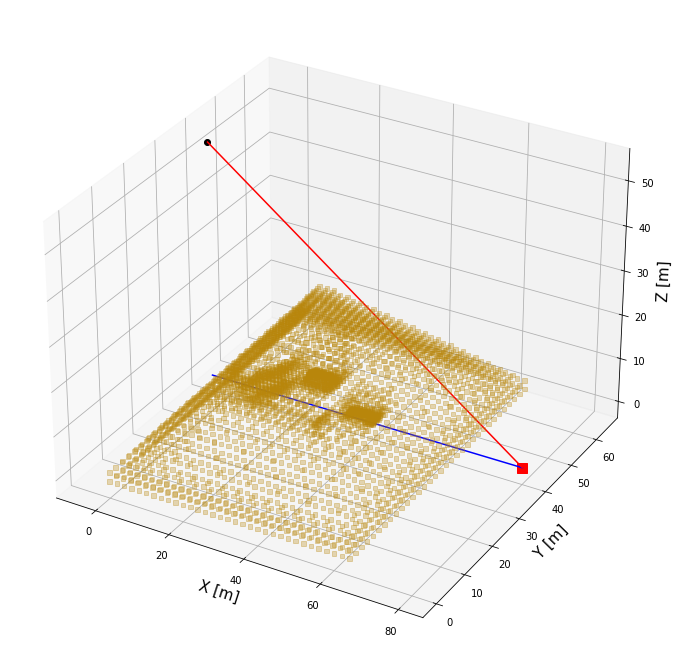

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x, y, z, c='darkgoldenrod', alpha=0.3, marker='s')
ax.plot(Po_x, Po_y, Po_z, 'r', marker='s', ms=10)
ax.plot(Ps_x, Ps_y, Ps_z, 'ok')
ax.plot(X_p, Y_p, 'b')
ax.plot(Px, Py, Pz, 'r')

ax.set_xlabel('X [m]', fontsize=15)
ax.set_ylabel('Y [m]', fontsize=15)
ax.set_zlabel('Z [m]', fontsize=15)

In [14]:
# Get elevation profile

Profilex = np.zeros(N)
Profiley = np.zeros(N)

M = len(x)
xi = []
yi = []

for i in range (N):

    Xo_p = int(find_nearest(x, X_p[i]))
    Yo_p = int(find_nearest(y, Y_p[i]))
    
    Profilex[i] = z[Xo_p]
    Profiley[i] = z[Yo_p]

Text(0.5, 0, 'X [m]')

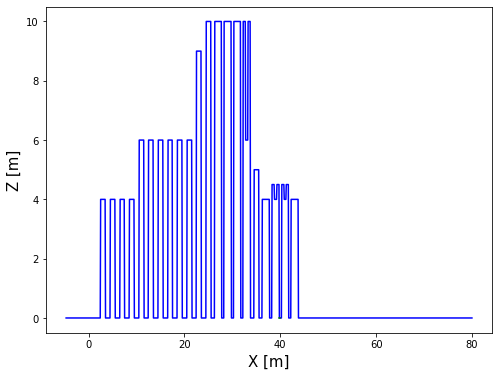

In [15]:
plt.figure(figsize=(8,6))
plt.plot(X_p,Profilex, 'b')
plt.plot(Y_p,Profiley, 'g')
plt.ylabel("Z [m]", fontsize=15)
plt.xlabel("X [m]", fontsize=15)

Text(0.5, 0, 'Z [m]')

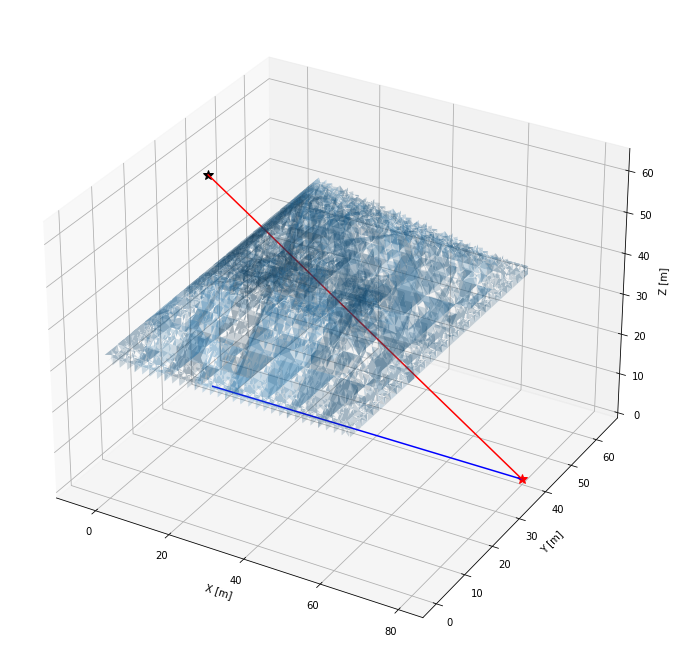

In [33]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(your_mesh.x, your_mesh.y, your_mesh.z, alpha=0.2)
ax.plot(Po_x, Po_y, Po_z, '*r', ms=10)
ax.plot(Ps_x, Ps_y, Ps_z, '*k', ms=10)
ax.plot(X_p, Y_p, 'b')
ax.plot(Px, Py, Pz, 'r')

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

## Segments treatement

1. Get segments
2. Remove zero values
3. Smooth the curve

In [43]:
h=[]
xx=[]

for i in range(len(y)):
    if y[i] == 35:
        if z[i] != 0: # remove zero values
            h.append(z[i])
            xx.append(x[i])

Text(0, 0.5, 'Z [m]')

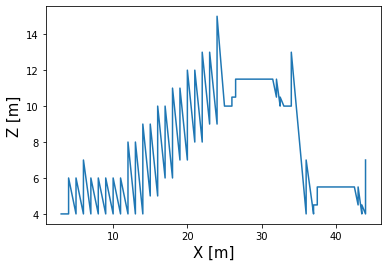

In [44]:
plt.figure()
plt.plot(xx,h)
plt.xlabel('X [m]', fontsize=15)
plt.ylabel('Z [m]', fontsize=15)

# Installation of resources

In [ ]:
!pip3.9 install numpy-stl